In [63]:
from skimage import io
import cv2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('./gothic.png')

def paste(ss,tt,cc):
    x,y = ss.shape
    a = cc[0] - x//2
    b = cc[1] - y//2
    tt[a:a + x, b:b + y] = ss
    
def clip(img):
    pp = find_bands(img,ax=1)
    a,b = pp[0][0],pp[-1][-1]
    pp = find_bands(img,ax=0)
    c,d = pp[0][0],pp[-1][-1]
    return img[a:b,c:d]

def rot(img, tt=90):

    dd = int(np.sqrt(2)*max(img.shape))
    cc = dd//2
    xx = np.ones((dd,dd))
    paste(img,xx,(cc,cc))

    M = cv2.getRotationMatrix2D((cc,cc), tt, 1.)
    return clip(cv2.warpAffine(xx, M,
                       (dd,dd), borderValue=1.))

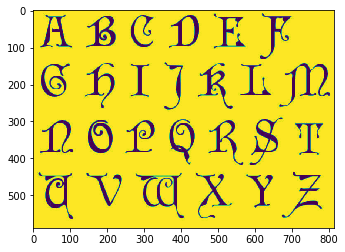

In [64]:
img = io.imread( "./gothic.png", as_gray=True)
plt.imshow(img);

In [65]:
def find_bands(img, ax=1):
    line_sum = img.sum(axis=ax)
    dd = img.shape[ax] - 1
    #clamp
    line_sum[line_sum<dd] = 0
    line_sum[line_sum>dd] = 1

    cx = np.convolve(line_sum, 
                     np.array([1,1,1]), 
                     mode = 'same' )

    bands = np.where(cx == 2)[0][1:-1]
    #plt.plot(cx)
    return  bands.reshape((-1,2))

letters = []
rows = find_bands(img,ax=1)
for a,b in rows:
    row = img[a:b,:]
    cols = find_bands(row,ax=0)
    for c,d in cols:
        letters.append(img[a:b,c:d])


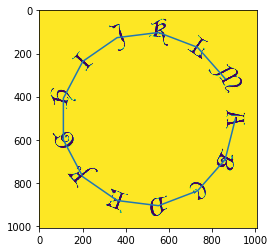

In [66]:
y,x = letters[0].shape
dx = y*8
target = np.ones((dx,dx))
cc = dx//2
R = cc - 100
T = np.linspace(0, 2*np.pi,13, endpoint=False)
X, Y = R*np.cos(T) + cc, R*np.sin(T) + cc
X = X.astype(int)
Y = Y.astype(int)
for x,y,t,i in zip(X,Y,-180*T/np.pi - 90,range(len(X))):
    paste(rot(letters[i],t),target, (y,x))
plt.imshow(target)
plt.plot(X,Y)


In [56]:
centers = np.load('./char_pos.npy')
angles = []
for n in [13,8,5]:
    tp = np.linspace(0,-360,n,endpoint=False).tolist()
    angles.extend(tp)


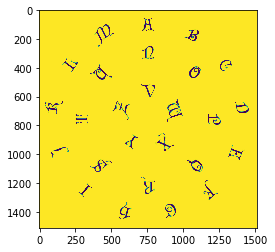

In [67]:
y,x = letters[0].shape
size = y*12
target = np.ones((size,size))
cc = size//2
R = cc - 100
positions = np.array([cc,cc]) - R*centers/100
positions = positions.astype(int)

for char,ang,p in zip(letters,angles,pos):
    paste(rot(char,ang), target, p)
    
plt.imshow(target)

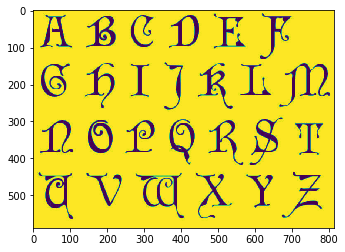

In [10]:
plt.imshow(img)

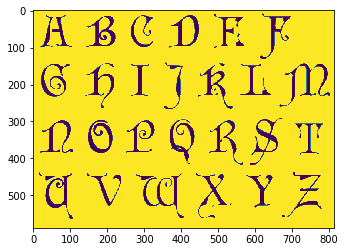

In [166]:
plt.imshow(img)

In [11]:
! ./.g

[main 9b4e521] web
 2 files changed, 275 insertions(+), 137 deletions(-)
 create mode 100644 .ipynb_checkpoints/turn_letters-checkpoint.ipynb
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 131.93 KiB | 3.00 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/macbuse/sigil.git
   12b47a4..9b4e521  main -> main


In [26]:
!pwd


/home/gregmcshane/sigil
